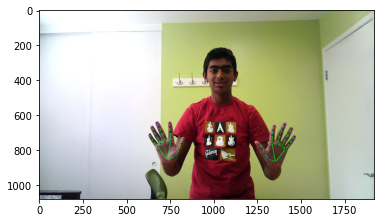

In [47]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os

import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

import time 
time.sleep(2)

cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    

    plt.imshow(image) 
    plt.show()
    cv2.imwrite("anish_hands.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    break 
cap.release()
cap.release()
cv2.destroyAllWindows()